In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

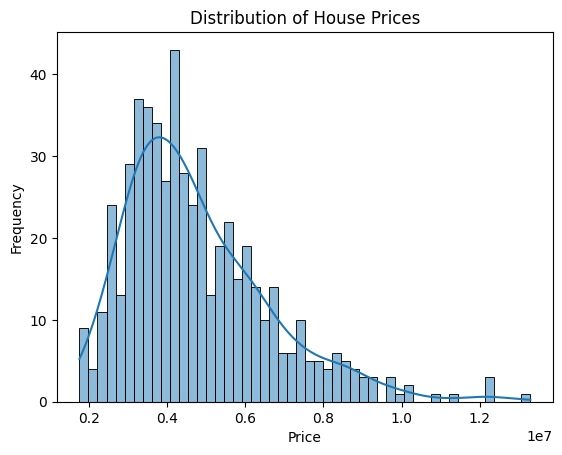

In [4]:


sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


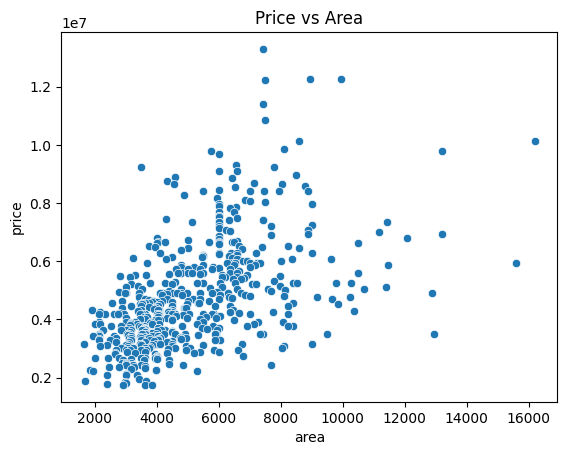

In [5]:
sns.scatterplot(x='area', y='price', data=df)
plt.title("Price vs Area")
plt.show()


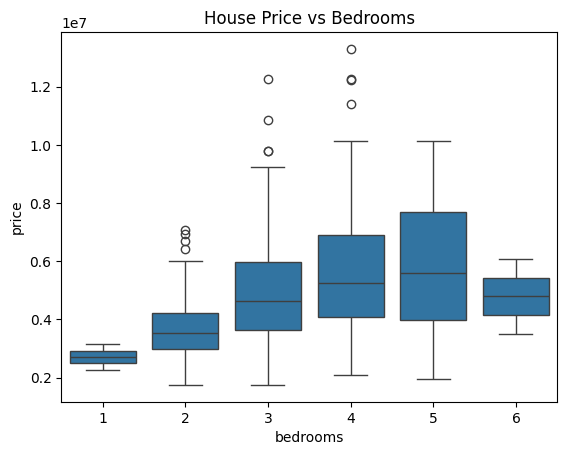

In [6]:
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title("House Price vs Bedrooms")
plt.show()

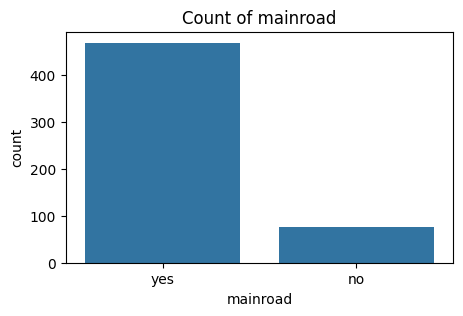

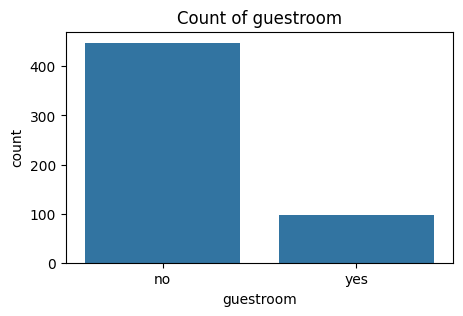

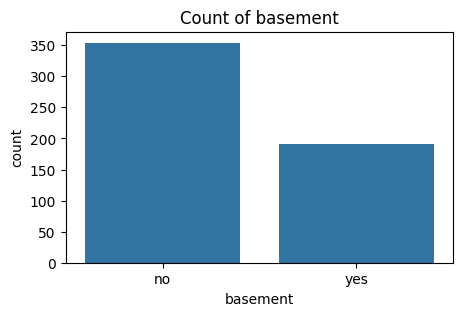

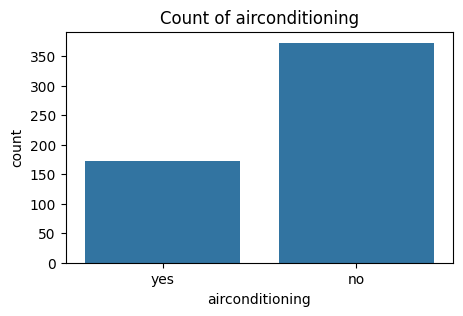

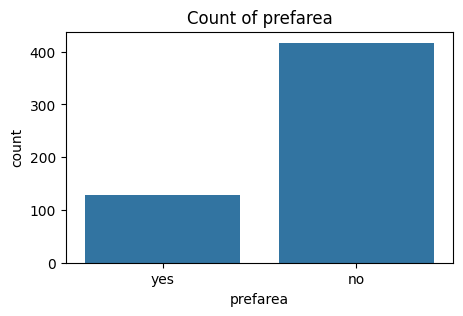

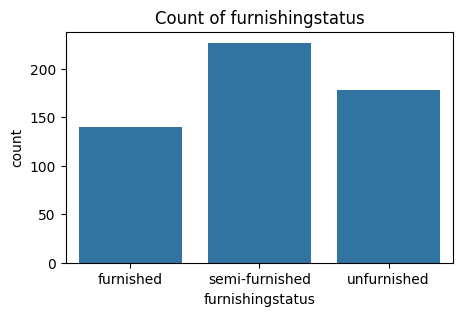

In [7]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.show()


In [8]:
# import matplotlib.pyplot as plt

# x_graph_columns = ['area', 'airconditioning', 'basement', 'bathrooms', 'bedrooms', 'furnishingstatus', 'guestroom']

# for col in x_graph_columns:
#     plt.figure(figsize=(12,6))
#     plt.scatter(X[col], y, label=col)
#     plt.xlabel(col)
#     plt.ylabel("Price ")
#     plt.legend()
#     plt.show()


In [11]:
#data preprocessing 
print(df['airconditioning'].unique())
print(df['guestroom'].unique())
print(df['mainroad'].unique())
print(df['basement'].unique())
print(df['hotwaterheating'].unique())
print(df['prefarea'].unique())
print(df['furnishingstatus'].unique())

['yes' 'no']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['furnished' 'semi-furnished' 'unfurnished']


In [13]:
# get_dummies doing the one hot encoding to column have object vlaues 
df2 = pd.get_dummies(df,drop_first=True,dtype=int)
df2.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


In [14]:
X= df2.drop('price',axis=1)
y = df2['price']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
# applying linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,f1_score
lr = LinearRegression()

lr.fit(X_train, y_train) 
y_pred = lr.predict(X_test)

print("mean_absolute_error :", mean_absolute_error(y_test,y_pred))
print("r2 score :", r2_score(y_test,y_pred))

mean_absolute_error : 970043.4039201637
r2 score : 0.6529242642153184


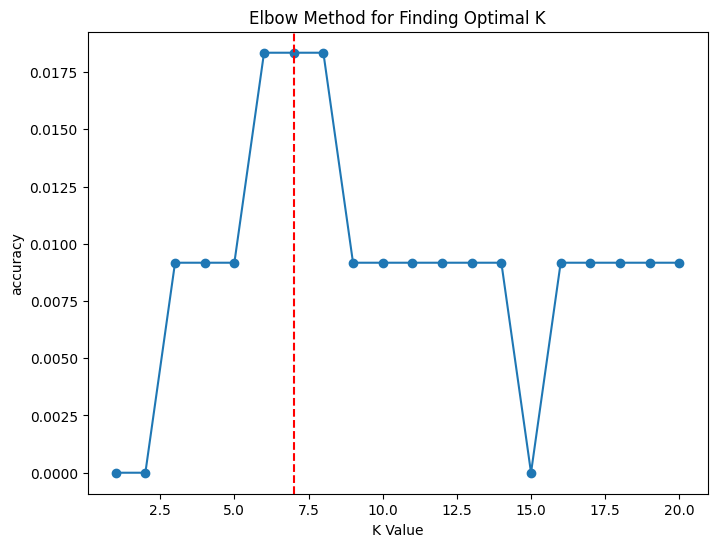

accuracy_score 0.01834862385321101


In [22]:
# applying KNN 

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scalar = StandardScaler()
X_train_knn = scalar.fit_transform(X_train)
X_test_knn = scalar.transform(X_test)


#elbo method
k_values = range(1, 21)
accu = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn, y_train)
    y_pred = knn.predict(X_test_knn)
    accuracy = accuracy_score(y_test, y_pred)
    accu.append(accuracy)

plt.figure(figsize=(8, 6))
plt.plot(k_values, accu, marker='o')
plt.xlabel('K Value')
plt.ylabel('accuracy')
plt.axvline(x=7, linestyle='--', color='red', label="Optimal K (Elbow Point)")
plt.title('Elbow Method for Finding Optimal K')
plt.show()



k = 7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_knn,y_train)
y_pred = knn.predict(X_test_knn)

print("accuracy_score",accuracy_score(y_test,y_pred))

In [28]:
# applying decision tree

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score



dt = DecisionTreeRegressor(
    max_depth=5,              # Limit depth to avoid overfitting
    min_samples_split=10,     # Minimum samples to split a node
    min_samples_leaf=5,       # Minimum samples per leaf
    random_state=42
)

dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R² Score: 0.48708436562995516
MAE: 1216327.6198218914


In [37]:
# applying random forest 

from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor(n_estimators=250,max_depth=10,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R² Score: 0.6174974450615095
MAE: 1014545.1457205606


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, scoring='r2')

# Fit to the training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best R² Score: 0.6419739440196808


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
405 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
325 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py"

In [39]:
#applying xg boost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error


xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R² Score: 0.5906509757041931
MAE: 1039358.25


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_reg = xgb.XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_grid,
    scoring='r2',
    cv=5,
    n_iter=25,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best R² Score:", random_search.best_score_)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Params: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best R² Score: 0.6446384072303772
